In [361]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Preparing Data

In [362]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()
#add one column of ones to the dataframe at the front
df.insert(0, 'Ones', 1)

df.columns = ['X0','Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,X0,Area,Bedrooms,Prices(1000$)
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [363]:
# check if missing values are present in the dataset
df.isnull().sum()

X0               0
Area             0
Bedrooms         0
Prices(1000$)    0
dtype: int64

In [364]:
# create a separate dataframe for features (X) and target (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 3) (47,)


In [365]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37, 3) (10, 3) (37,) (10,)


In [366]:
df.describe()

,X0,Area,Bedrooms,Prices(1000$)
count,47.0,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.0,3.779483e-17,2.746030e-16,-9.684924e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,1.0,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,1.0,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,1.0,3.376348e-01,1.090417e+00,3.521863e-01
max,1.0,3.117292e+00,2.404508e+00,2.874981e+00


Hypothesis Function 

In [367]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    return np.dot(theta, x)

The Cost Function

In [368]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        print(len(x), len(y))
        x = np.insert(x, 0, 1, axis=1)
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2
    return cost/2*(len(y))

Batch Gradient Descent

In [369]:
def batch_gradient_descent(theta, x, y, alpha, iterations):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    prev_theta = theta.copy()
    for i in range(iterations):
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            theta[j] = theta[j] - alpha*(1/(len(y)))*temp
        #compare theta with previous theta approimately to check for convergence
        if np.array_equal(prev_theta, theta):
            break
        else:
            prev_theta = theta.copy()

        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))

    return theta, theta_list, cost_list, i

Training our data

In [370]:
#calculate theta using batch gradient descent - training step 
theta = np.zeros(3)
theta, theta_list, cost_list,itrs = batch_gradient_descent(theta, X_train, y_train, 0.1, 1000)


[-0.00765962  0.08464284  0.03630597] cost is 514.9835171619089
[-0.01409998  0.15835986  0.06580158] cost is 432.5858644057569
[-0.01949624  0.22267306  0.08953495] cost is 371.1997832344564
[-0.02399884  0.27888724  0.10840023] cost is 325.3036906470202
[-0.02773705  0.32812121  0.12316   ] cost is 290.8422946707028
[-0.03082192  0.37133451  0.1344643 ] cost is 264.83570067599425
[-0.03334885  0.40935027  0.14286699] cost is 245.0928932259723
[-0.03539979  0.44287483  0.14883971] cost is 230.00170147178895
[-0.03704514  0.47251451  0.15278386] cost is 218.3748128649565
[-0.03834536  0.49878989  0.15504081] cost is 209.3368626610161
[-0.03935236  0.52214816  0.15590063] cost is 202.24162867247227
[-0.04011073  0.54297362  0.15560962] cost is 196.6112926626024
[-0.04065874  0.56159668  0.15437665] cost is 192.09187782809744
[-0.04102922  0.57830153  0.15237869] cost is 188.42054562517853
[-0.04125034  0.59333281  0.14976545] cost is 185.4015883099992
[-0.04134626  0.6069012   0.1466634

In [371]:
#test the model on the test set
y_pred = []
for i in range(len(y_test)):
    y_pred.append(hypothesis(theta, X_test[i]))
    print(hypothesis(theta, X_test[i]), y_test[i])



0.17782746975633845 1.076355154400406
1.1209239745937098 1.9152873700130346
-0.17274996890723715 0.07587450451346749
0.9702612217855554 1.595389480360936
0.576717216031647 1.276275340538485
-0.02347381195921573 0.05268190751369034
0.5344439468713806 -0.21123385144929105
-1.0044374708709871 -1.3636659989209765
-0.422050349756013 -0.7798523503058964
-0.09663557130688168 -0.8030529447529149


J vs iterations

Text(0.5, 1.0, 'Error vs. Training Epoch')

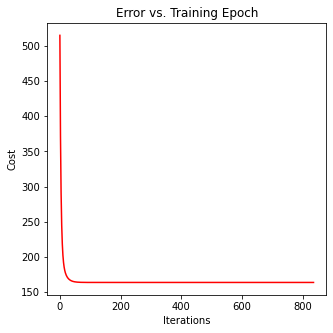

In [372]:

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Plot of hypothesis plane

In [373]:
X = df[['Area', 'Bedrooms']].values.reshape(-1,2)
y = df['Prices(1000$)']
x=X[:,0]
y=X[:,1]
z=y
#calculate the range of the Area and Bedrooms and create a meshgrid
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
#calculate the z values for the meshgrid
z = np.array([hypothesis(theta, [xx[i][j], yy[i][j]]) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
z = z.reshape(xx.shape)
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap='viridis')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Prices(1000$)')
ax.set_title('3D Plot of the data')
plt.show()




ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

Contour plot of J vs theta

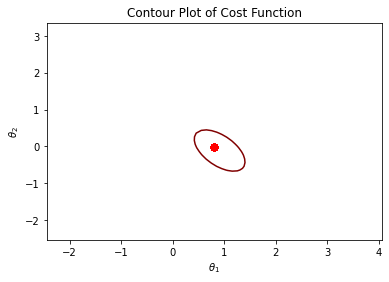

In [ ]:
#Plot a contour plot of the cost function vs theta1 and theta2
#create a meshgrid of theta1 and theta2
theta1_min, theta1_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
theta2_min, theta2_max = X_train[:,2].min() - 1, X_train[:,2].max() + 1
theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
fig, ax = plt.subplots(1, 1)
  
Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
Z = Z.reshape(theta1_grid.shape)
ax.contour(theta1_grid, theta2_grid, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_title('Contour Plot of Cost Function')
#plot theta_list on the contour plot
for i in range(len(theta_list)):
    ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
    
plt.show()
